In [11]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [30]:
x1 = np.array([1.0,1.5,2.0,2.5,2.5,3.0,3.5])
x2 = np.array([1.4,1.4,1.4,1.6,1.6,1.9,1.9])
x3 = np.array([1.0,1.5,1.1,1.8,2.1,1.5,2.0])
data = np.array([[1.0,1.4,1.0],[1.5,1.4,1.5],[2.0,1.4,1.1],[2.5,1.6,1.8],[2.5,1.6,2.1],[3.0,1.9,1.5],[3.5,1.9,2.0]])
data

array([[1. , 1.4, 1. ],
       [1.5, 1.4, 1.5],
       [2. , 1.4, 1.1],
       [2.5, 1.6, 1.8],
       [2.5, 1.6, 2.1],
       [3. , 1.9, 1.5],
       [3.5, 1.9, 2. ]])

components [[-0.91023776 -0.21527018 -0.35373151]
 [-0.32143283 -0.17121939  0.93132425]]

variance [0.88033723 0.07936532]
(7, 3)
[[ 1.41549201 -0.08467062]
 [ 0.78350738  0.22027509]
 [ 0.4698811  -0.31297103]
 [-0.27590386  0.14399565]
 [-0.38202332  0.42339292]
 [-0.68948434 -0.34748386]
 [-1.32146897 -0.04253815]]


Text(0, 0.5, 'component 2')

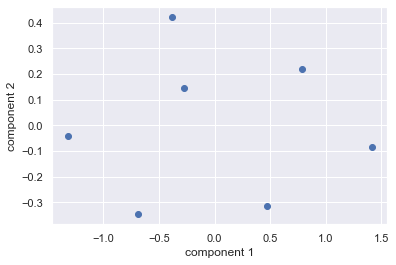

In [32]:
pca =PCA(n_components=2)
pca.fit(data)
print("components", pca.components_)
print("\nvariance", pca.explained_variance_)
print(data.shape)

transformed= pca.transform(data)
print(transformed)

plt.scatter(transformed[:, 0], transformed[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [35]:
#Euclidean distance
print(np.linalg.norm(data[:,0]))
print(np.linalg.norm(data[:,1]))
print(np.linalg.norm(data[:,2]))

6.4031242374328485
4.268489194082608
4.28485705712571


In [12]:
# test classification dataset
from sklearn.datasets import make_classification
import pandas as pd

# reading csv files
namesList=['Sample code number','Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 
       'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data =  pd.read_csv('breast-cancer-wisconsin.data', header=None, names=namesList) 
#remove unnecessary columns and clean data
data.drop(['Sample code number'], axis = 1, inplace = True)
data['Bare Nuclei'].replace('?','0', inplace=True)
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


C:\Users\nismai01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


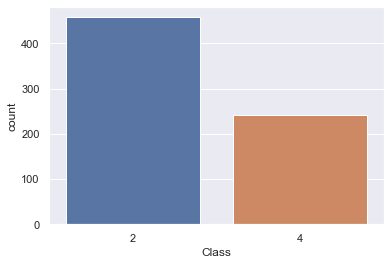

In [13]:
sns.countplot(data['Class'])
plt.show()

In [14]:
# Feature and result separation
X = data.loc[:, data.columns != 'Class'].values
y = data['Class'].values

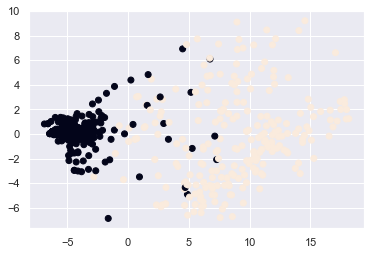

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables
plt.scatter(Z[:,0],Z[:,1], c=y)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled.shape

(699, 9)

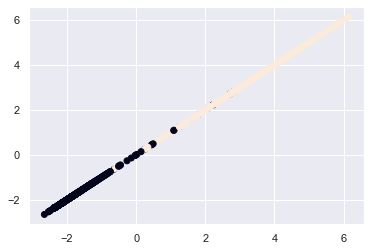

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)
plt.scatter(X_lda,X_lda, c=y)

In [27]:
import scipy.linalg as la
# from sympy import Symbol, Derivative
import sympy as sp
#𝑓(𝑥,𝑦,𝑧)=3𝑥2−2𝑥1𝑥2+5 𝑥22+6𝑥1𝑥3+8𝑥32
x= sp.Symbol('x')
y= sp.Symbol('y')
z= sp.Symbol('z')
f= 3*x**2-2*x*y+5*y**2+6*x*z+8*z**2
f_px=sp.diff(f,x)
f_py=sp.diff(f,y)
f_pz=sp.diff(f,z)
f_xx=sp.diff(f_px,x)
f_yx=sp.diff(f_py,x)
f_zx=sp.diff(f_pz,x)
f_xy=sp.diff(f_px,y)
f_yy=sp.diff(f_py,y)
f_zy=sp.diff(f_pz,y)
f_xz=sp.diff(f_px,z)
f_yz=sp.diff(f_py,z)
f_zz=sp.diff(f_pz,z)

hessian = np.array([[f_xx, f_yx,f_zx], [f_xy, f_yy,f_zy],[f_xz,f_yz,f_zz]], dtype=float)

print("Gradients of matrix : \n", "with respect to x\n",f_px,"\nwith respect to y\n",f_py,"\nwith respect to z\n",f_pz)
print("The hessian matrix : \n",hessian)

Gradients of matrix : 
 with respect to x
 6*x - 2*y + 6*z 
with respect to y
 -2*x + 10*y 
with respect to z
 6*x + 16*z
The hessian matrix : 
 [[ 6. -2.  6.]
 [-2. 10.  0.]
 [ 6.  0. 16.]]


A is positive definite all eigen values are positive

In [26]:
##Eigen values of hessian matrix
v,w = np.linalg.eig(hessian)
print("Eigen values and vectors of the hessian matrix\n", v,"\n\n", w)

Eigen vectors of the hessian matrix
 [ 2.73539537 18.89311621 10.37148843] 

 [[-0.88374606 -0.43227348 -0.17925552]
 [-0.2433019   0.0972153   0.96506651]
 [ 0.39974628 -0.89648693  0.1910866 ]]


The eigen values of Hessian at a given point has all positive eigenvalues, it is
said to be a positive-definite matrix. This is the multivariable equivalent of “concave up”. And our surface has a local minima at the criticalpoint